In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('https://raw.githubusercontent.com/Pravalika05/Data_Analyst_Portfolio/main/Data%20Visualization%20Diamond%20Data/diamonds.csv')

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

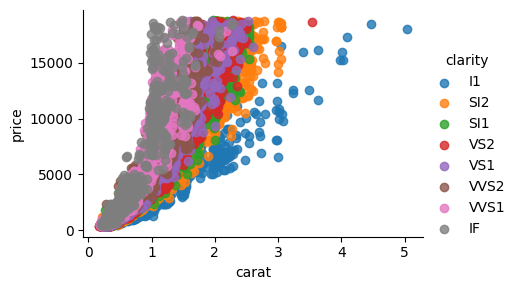

In [5]:
# multivariate plot of price by carat weight, and clarity
g = sb.FacetGrid( data = diamonds, hue = 'clarity',aspect=1.5 )
g = g.map(sb.regplot, 'carat' ,'price', x_jitter = 0.04 , fit_reg = False);
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

Price by Carat and Clarity Comment 1: <span style="color:white">With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.</span>

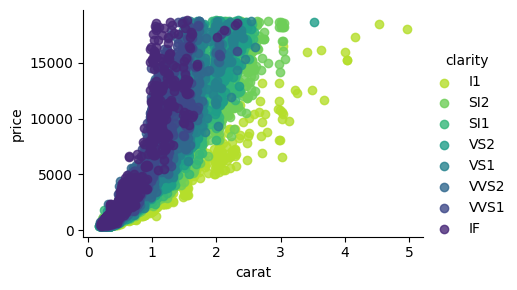

In [7]:
g = sb.FacetGrid( data = diamonds, hue = 'clarity',aspect=1.5 , palette = 'viridis_r')
g = g.map(sb.regplot, 'carat' ,'price', x_jitter = 0.04 , fit_reg = False);
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

([<matplotlib.axis.YTick at 0x7e03291b5c30>,
 [Text(0, 2.3010299956639813, '200'),
  Text(0, 2.6989700043360187, '500'),
  Text(0, 3.3010299956639813, '2000'),
  Text(0, 3.6989700043360187, '5000'),
  Text(0, 4.301029995663981, '20000'),
  Text(0, 4.698970004336019, '50000')])

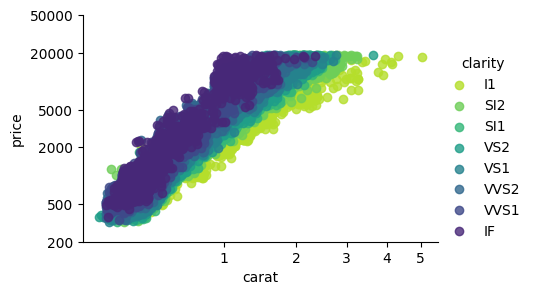

In [9]:
# let's try to apply transformation functions to price and carat( x and y axis)
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)

def cuberoot_trans(x, inverse = False):
    if not inverse:
        return np.power(x, 1/3)
    else:
        return np.power(x, 3)

#sb.regplot(diamonds['carat'].apply(cuberoot_trans), diamonds['price'].apply(log_trans))
diamonds['carat_cr'] = diamonds['carat'].apply(cuberoot_trans)
diamonds['price_log'] = diamonds['price'].apply(log_trans)

g = sb.FacetGrid( data = diamonds, hue = 'clarity', aspect=1.5 , palette = 'viridis_r')
g = g.map(sb.regplot, 'carat_cr' ,'price_log', x_jitter = 0.04 , fit_reg = False);
# pay attention what to be put inside map(), does it really need x = , y =
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
x_tick_locs = [1, 2, 3, 4, 5]
plt.xticks(cuberoot_trans(x_tick_locs), x_tick_locs)

y_tick_locs = [200, 500 , 2000, 5000, 20000,50000]    # the tick_locs should be set according to real values
plt.yticks(log_trans(y_tick_locs), y_tick_locs)

Price by Carat and Clarity Comment 2: <span style="color:white">You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?</span>

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

([<matplotlib.axis.YTick at 0x7e0328ecf220>,
 [Text(0, 3.3010299956639813, '2000'),
  Text(0, 3.4771212547196626, '3000'),
  Text(0, 3.6020599913279625, '4000'),
  Text(0, 3.6989700043360187, '5000'),
  Text(0, 4.0, '10000')])

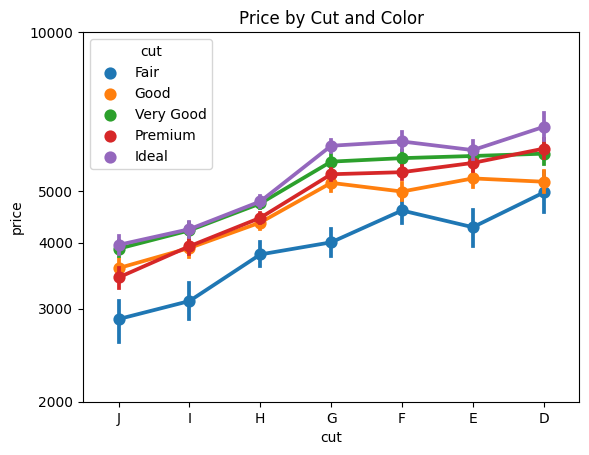

In [10]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
# two categorical vs one numerical
#carat_flag = (diamonds['carat']>= 0.99) & (diamonds['carat']<=1.03)
# diamonds_sub = diamonds.loc[ carat_flag , : ]

# here one parenthesis for each condition is a must
diamonds_sub = diamonds.loc[ (diamonds['carat']>= 0.99) & (diamonds['carat']<=1.03) , : ]

# cut and color vs price ( two categorical vs one numerical )
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)

diamonds['price_log'] = diamonds['price'].apply(log_trans)

sb.pointplot(data = diamonds_sub, x = 'color', y = 'price_log', hue = 'cut')
# cut has less types so choose it as hue

plt.title('Price by Cut and Color')
plt.xlabel('cut')
plt.ylabel('price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
y_tick_locs = [2000,3000, 4000, 5000, 10000]    # the tick_locs should be set according to real values
plt.yticks(log_trans(y_tick_locs), y_tick_locs)

Price by Cut and Color Comment 2: <span style="color:white">Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out? </span>

([<matplotlib.axis.YTick at 0x7e0328f76440>,
 [Text(0, 3.3010299956639813, '2000'),
  Text(0, 3.4771212547196626, '3000'),
  Text(0, 3.6020599913279625, '4000'),
  Text(0, 3.6989700043360187, '5000'),
  Text(0, 4.0, '10000')])

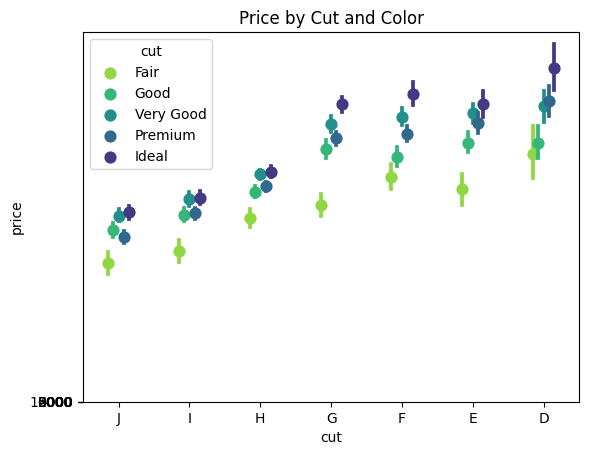

In [11]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
# two categorical vs one numerical

# here one parenthesis for each condition is a must
diamonds_sub = diamonds.loc[ (diamonds['carat']>= 0.99) & (diamonds['carat']<=1.03) , : ]

# cut and color vs price ( two categorical vs one numerical )
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)

diamonds['price_log'] = diamonds['price'].apply(log_trans)

ax = sb.pointplot(data = diamonds_sub, x = 'color', y = 'price', hue = 'cut' , palette = 'viridis_r', dodge = 0.3, linestyles = "")

# cut has less types so choose it as hue

plt.title('Price by Cut and Color')
plt.xlabel('cut')
plt.ylabel('price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
y_tick_locs = [2000,3000, 4000, 5000, 10000]    # the tick_locs should be set according to real values
plt.yticks(log_trans(y_tick_locs), y_tick_locs)